In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
dat_file = "/gpfs/commons/home/mschertzer/asb_model/220708_all_ipsc_ip/enrichment_values/all_data_gencode_v41_300w_100s.txt.gz"
dat = pd.read_csv(dat_file, sep = "\t")
dat.rename(columns={"X1":"chrom","X2":"start","X3":"end","X4":"gene","X6":"strand"}, inplace=True)
dat

,chrom,start,end,gene,X5,strand,CW30154-hnrnpk,CW30154-input,hnrnpa1-rep1,hnrnpk-rep1,hnrnpk-rep2,input-rep1,input-rep2,rbfox2-rep2
0,chr1,65419,65719,ENSG00000186092.7,.,+,0,0,0,0,0,0,0,0
1,chr1,65519,65819,ENSG00000186092.7,.,+,0,0,0,0,0,0,0,0
2,chr1,65619,65919,ENSG00000186092.7,.,+,0,0,0,0,0,0,0,0
3,chr1,65719,66019,ENSG00000186092.7,.,+,0,0,0,0,0,0,0,0
4,chr1,65819,66119,ENSG00000186092.7,.,+,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13800279,chrM,15447,15747,ENSG00000198727.2,.,+,78292,10783,37243,685023,583759,100210,116039,28846
13800280,chrM,15547,15847,ENSG00000198727.2,.,+,69660,9659,29247,608916,541008,92383,107683,24885
13800281,chrM,15647,15887,ENSG00000198727.2,.,+,64675,9019,23412,567753,514752,86913,101927,22927
13800282,chrM,15747,15887,ENSG00000198727.2,.,+,29685,6007,13815,276546,309839,57881,67280,14521


In [5]:
dat_all = dat[(dat["input-rep1"] > 15) & (dat["input-rep2"] > 15)].copy()

In [6]:
dat_all["hnrnpk_enrich_1"] = dat["hnrnpk-rep1"] / dat["input-rep1"]
dat_all["hnrnpk_enrich_2"] = dat["hnrnpk-rep2"] / dat["input-rep2"]
dat_all["hnrnpa1_enrich"] = dat["hnrnpa1-rep1"] / dat["input-rep1"]
dat_all["rbfox2_enrich"] = dat["rbfox2-rep2"] / dat["input-rep2"]

,hnrnpk_enrich_1,hnrnpk_enrich_2,hnrnpa1_enrich,rbfox2_enrich
285,0.231263,0.184605,0.525696,1.140900
287,0.210360,0.149679,0.586398,1.075298
289,0.217143,0.142785,0.641758,1.086781
291,0.229665,0.135550,0.702153,1.010230
293,0.257956,0.130952,0.768007,0.952381
...,...,...,...,...
13800279,6.835875,5.030714,0.371650,0.248589
13800280,6.591213,5.024080,0.316584,0.231095
13800281,6.532429,5.050203,0.269373,0.224935
13800282,4.777837,4.605217,0.238679,0.215829


In [12]:
#cor_mat = np.corrcoef(dat_all.iloc[:,-4:].to_numpy().transpose())
cor_mat = dat_all.iloc[:,-4:].corr()

In [20]:
cor_mat

,hnrnpk_enrich_1,hnrnpk_enrich_2,hnrnpa1_enrich,rbfox2_enrich
hnrnpk_enrich_1,1.000000,0.920436,0.014718,0.158070
hnrnpk_enrich_2,0.920436,1.000000,-0.036073,0.170296
hnrnpa1_enrich,0.014718,-0.036073,1.000000,0.018436
rbfox2_enrich,0.158070,0.170296,0.018436,1.000000


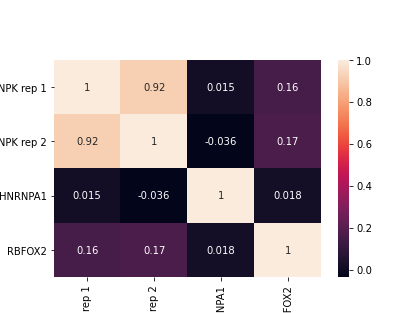

In [23]:
#plt.figure( figsize = (6,4))
plt.figure()
sns.heatmap(
    cor_mat, 
    annot=True, 
    xticklabels = ["HNRNPK rep 1", "HNRNPK rep 2", "HNRNPA1", "RBFOX2"],
    yticklabels = ["HNRNPK rep 1", "HNRNPK rep 2", "HNRNPA1", "RBFOX2"] )
plt.savefig("enrich_corr.pdf", bbox_inches = "tight")

In [ ]:
#plt.figure( figsize = (6,4))
plt.figure()
sns.heatmap(
    cor_mat, 
    annot=True, 
    xticklabels = ["HNRNPK rep 1", "HNRNPK rep 2", "HNRNPA1", "RBFOX2"],
    yticklabels = ["HNRNPK rep 1", "HNRNPK rep 2", "HNRNPA1", "RBFOX2"] )
plt.savefig("enrich_corr.pdf", bbox_inches = "tight")